## Diabetes Prediction

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.stats import iqr
import os
sns.set()
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 2. Loading The Data


In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Inspecting The Data

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATASET DESCRIPTION

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and was downloaded from Kaggle. It comprises 768 instances and 9 fields, with the goal of diagnosing diabetes in Pima Indians living in America. Out of the instances, 268 are diabetic (labeled as 1) and 500 are non-diabetic (labeled as 0) in the target attribute (Outcome). All patients in the database are females aged at least 21 years. The attributes in the database include integers or real numbers.

## Features:

1. **Pregnancies:** Number of times the person was pregnant.
2. **Glucose:** Concentration of glucose in the blood (plasma). For a healthy person, the normal glucose concentration is between 4.0 to 5.4 mmol/L (72 to 99 mg/dL) and up to 7.8 mmol/L (140 mg/dL) 2 hours after eating.
3. **Blood Pressure:** Diastolic blood pressure (mm Hg). Normal blood pressure should be less than or equal to 120/80 mmHg for females.
4. **Skin Thickness:** Triceps skinfold thickness (mm). Standard normal values are 2.5mm for men (about 20% fat) and 18.0mm for women (about 30% fat).
5. **Insulin:** 2-Hour serum insulin (mu U/ml). Normal insulin level range 2 hours after glucose administration is 16-166 mIU/L.
6. **BMI:** Body mass index (weight in kg/(height in m)²). BMI categories: underweight (BMI ≤ 18.5), normal weight (18.5 < BMI ≤ 24.9), overweight (25 ≤ BMI ≤ 29.9), obese (BMI ≥ 30).
7. **Diabetes Pedigree Function:** A function scoring the likelihood of diabetes based on family history.
8. **Age:** Age in years.
9. **Outcome (Target Variable):** 0 (no diabetes), 1 (has diabetes).


### 4. Apply Exploratory Data Analysis (EDA)
<ul>
<li> Summary Statistics </li>
<li> Data Cleaning </li>
<li> Data Visualization </li>
<li> Handling Missing Data </li>
<li> Outlier Detection </li>
<li> Feature Engineering </li>
<li> Correlation Analysis </li>
<li> Data Distribution </li>
<li> Data Preprocessing Decisions </li>
</ul>



In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print("Number of rows present in the dataset are: ", df.shape)


Number of rows present in the dataset are:  (768, 9)


In [6]:
df.duplicated().sum()


0

In [7]:
df = df.rename(columns = {'DiabetesPedigreeFunction':'DPF'})


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
# replacting 0 with nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1


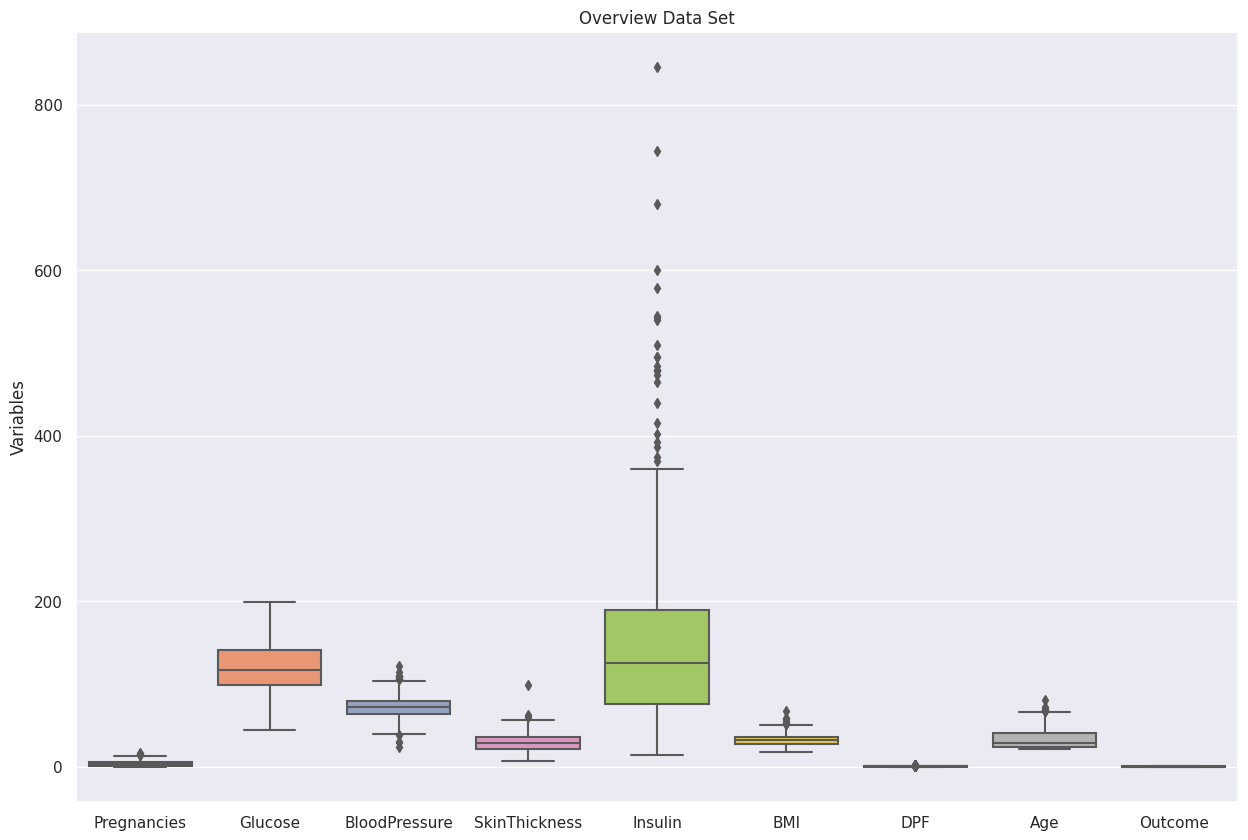

In [11]:
# Distribution of all variables
f, ax= plt.subplots(figsize=(15, 10))

ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, orient = 'v', palette = 'Set2')

<Axes: xlabel='Outcome', ylabel='count'>

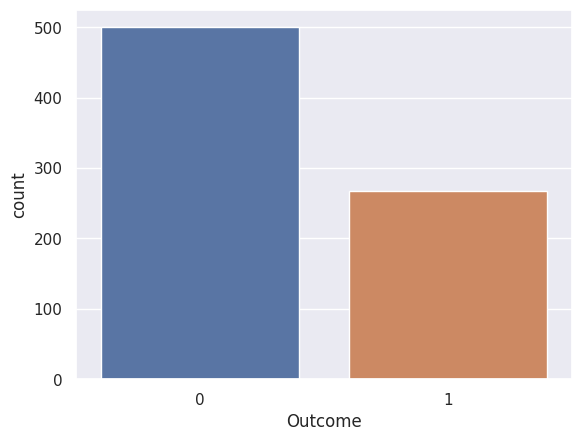

In [12]:
sns.countplot(df, x="Outcome")


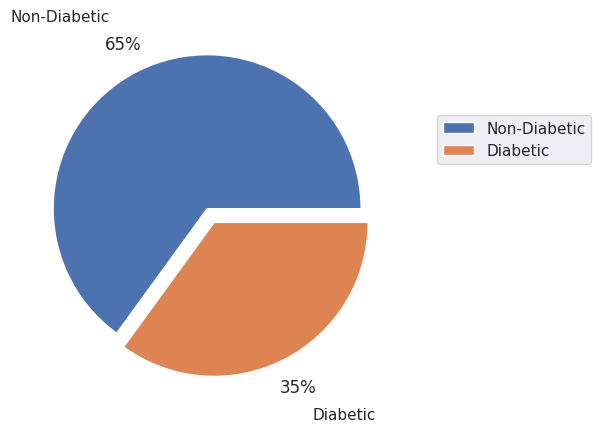

In [13]:
Non_Diabetic = round(500 / 768 * 100)
Diabetic = round(268 / 768 * 100)
fig, ax = plt.subplots(figsize=(10,5))

labels = ['Non-Diabetic',
         'Diabetic']
percentages = [Non_Diabetic, Diabetic]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%',
       shadow=False, startangle=0,
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=True,bbox_to_anchor=(1.5,0.8))
plt.show()

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DPF,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

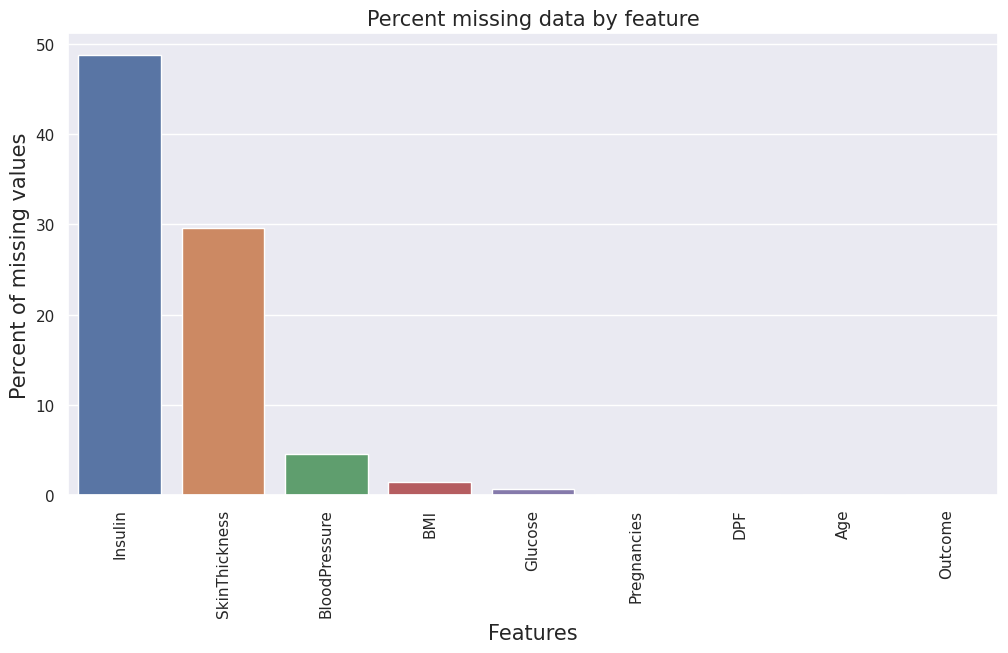

In [15]:
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Highlights

<pre>Insulin has 374 missing values which is about 48.7% of total missing values.
SkinThickness has 227 missing values which is only 29.6% of total missing values.
BloodPressure has 35 missing values which is only 4.6% of total missing values.
BMI has only 11 missing values which is only 1.4% of total missing values. </pre>

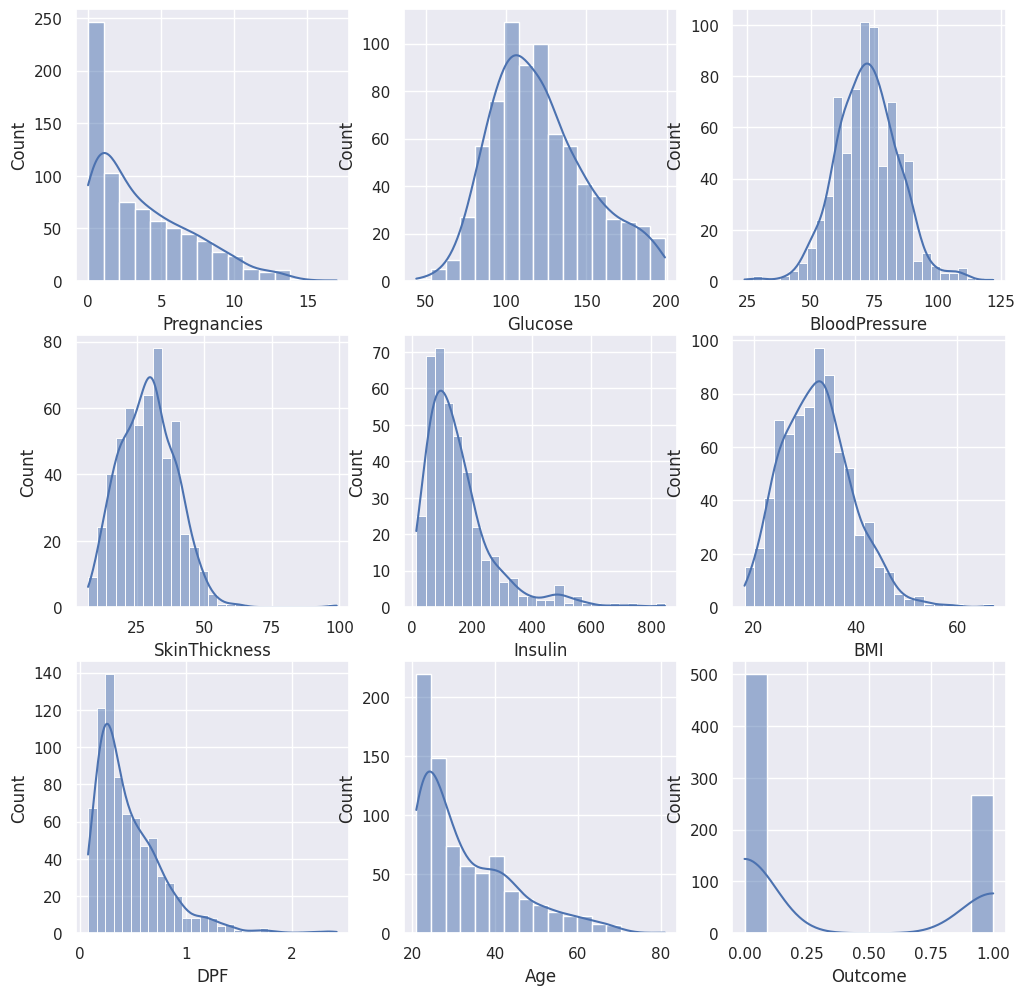

In [16]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF',
'Age', 'Outcome']):
    plt.subplot(3,3, i+1)
    sns.histplot(data = df , x = col,kde=True)
plt.show()

In [17]:
# function to find the mean
def median_target(var):
    temp = df[df[var].notnull()]
    temp = round(temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index(), 1)
    return temp

In [18]:
median_target("Glucose")

,Outcome,Glucose
0,0,110.6
1,1,142.3


In [19]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 110.6
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 142.3

In [20]:
median_target("BloodPressure")

,Outcome,BloodPressure
0,0,70.9
1,1,75.3


In [21]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.9
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 75.3

In [22]:
median_target("SkinThickness")

,Outcome,SkinThickness
0,0,27.2
1,1,33.0


In [23]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.2
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 33.0

In [24]:
median_target("Insulin")

,Outcome,Insulin
0,0,130.3
1,1,206.8


In [25]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 130.3
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 206.8

In [26]:
median_target("BMI")

,Outcome,BMI
0,0,30.9
1,1,35.4


In [27]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.9
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 35.4

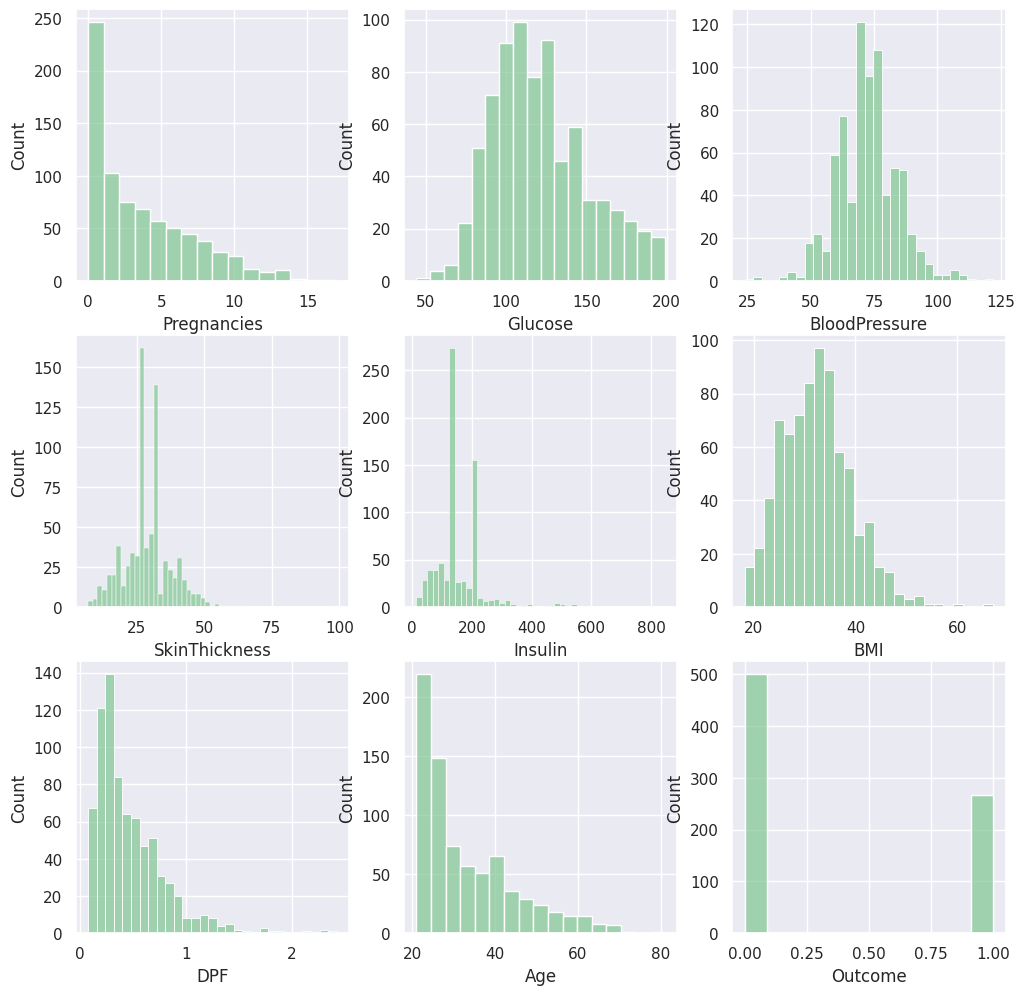

In [28]:
#Check the distribution of each column after NaN removal
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF',
'Age', 'Outcome']):
    plt.subplot(3,3, i+1)
    sns.histplot(data = df , x = col,kde=False ,color = '#88c999')
plt.show()

In [29]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 44.0
The minimum value fore the columns BloodPressure is 24.0
The minimum value fore the columns SkinThickness is 7.0
The minimum value fore the columns Insulin is 14.0
The minimum value fore the columns BMI is 18.2
The minimum value fore the columns DPF is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


In [30]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,137
BloodPressure,48
SkinThickness,51
Insulin,187
BMI,247
DPF,517
Age,52
Outcome,2


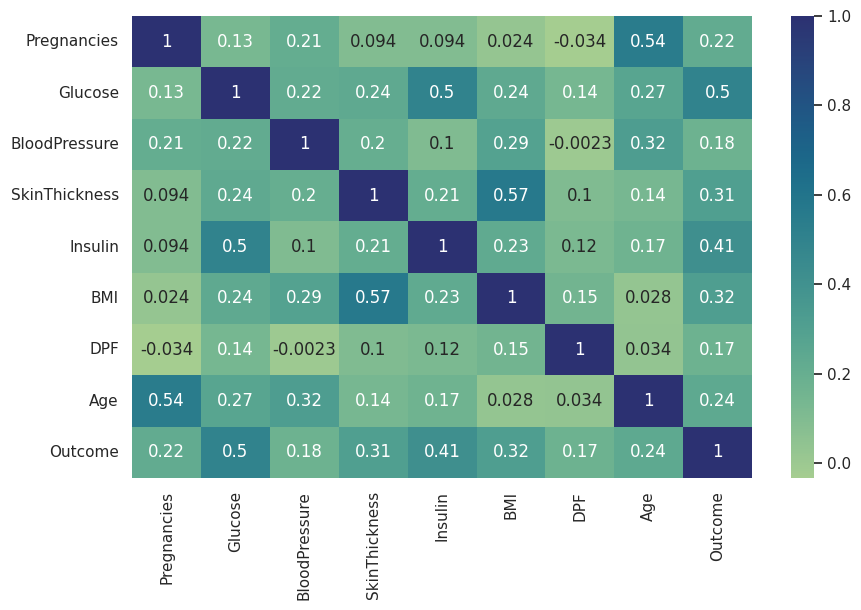

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap='crest')
plt.show()

<Figure size 1000x600 with 0 Axes>

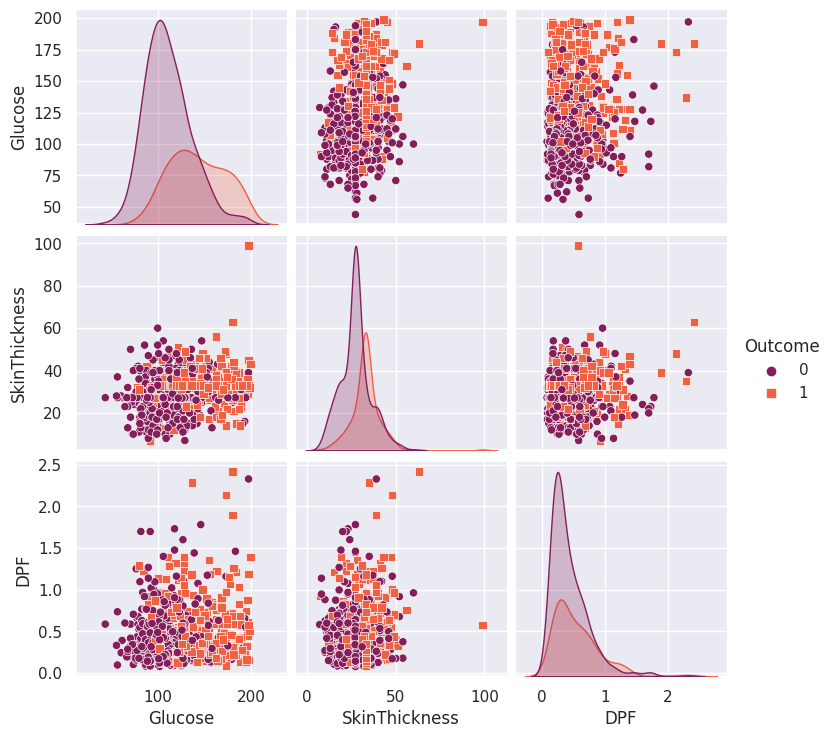

In [32]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df,vars=['Glucose', 'SkinThickness', 'DPF'], hue='Outcome',palette='rocket', markers=["o", "s"])
plt.show()

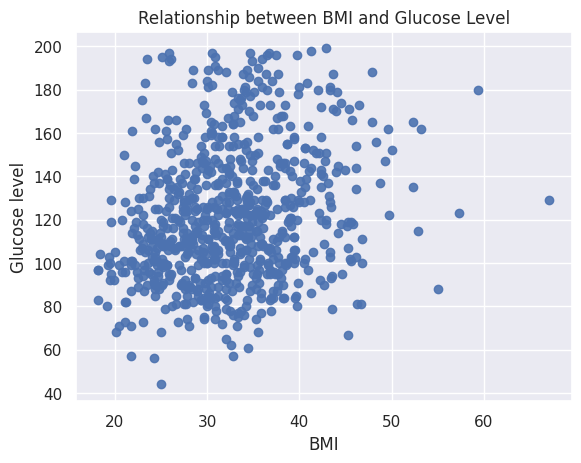

In [33]:
plt.scatter(df['BMI'], df['Glucose'], alpha=0.9)
plt.title('Relationship between BMI and Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.show()

Text(0.5, 1.0, 'Glucose vs Blood Pressure')

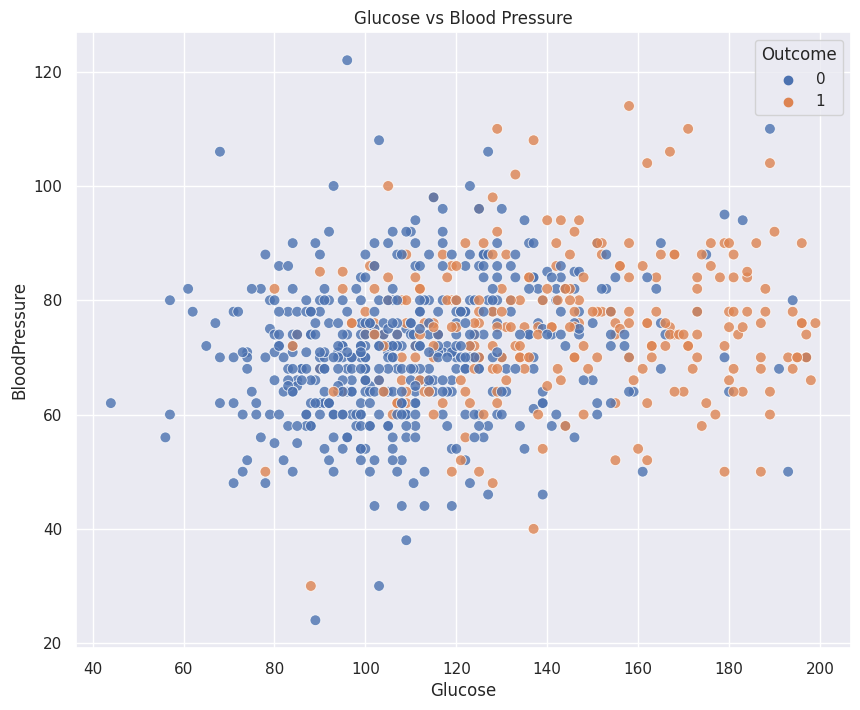

In [34]:
# Glucose vs BP
plt.rcParams["figure.figsize"] = (10, 8)
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=df, s=60, alpha=0.8)
plt.title('Glucose vs Blood Pressure')

<Axes: xlabel='Outcome', ylabel='BMI'>

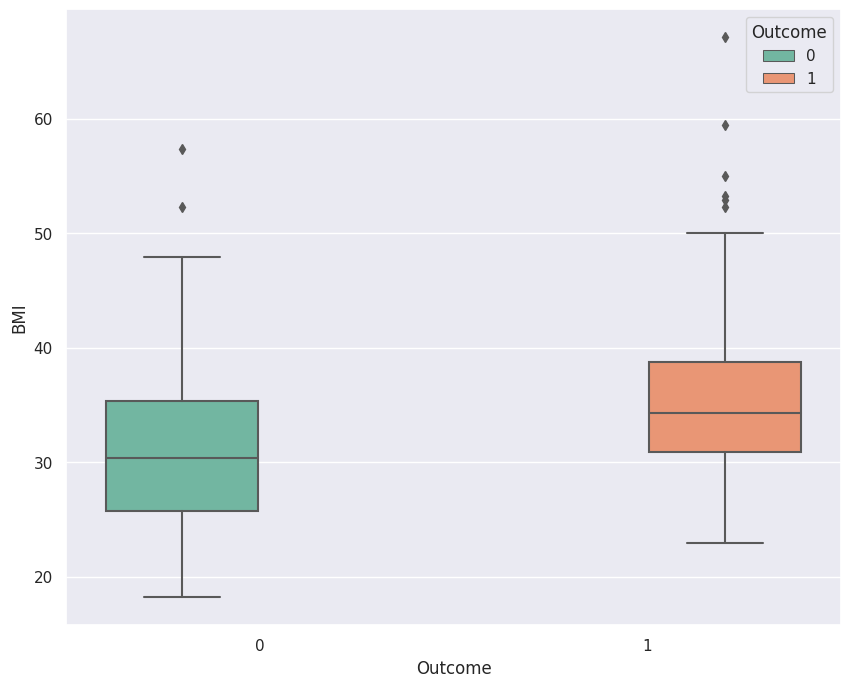

In [35]:

sns.boxplot(x='Outcome', y='BMI',data=df, hue='Outcome',palette='Set2')

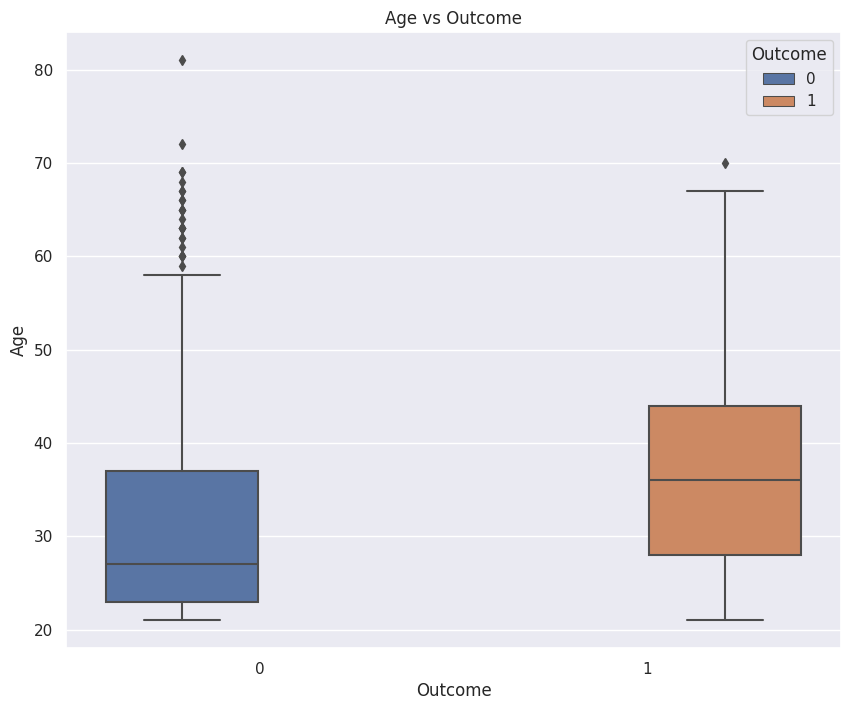

In [36]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df,hue='Outcome')
plt.title('Age vs Outcome')
plt.show()

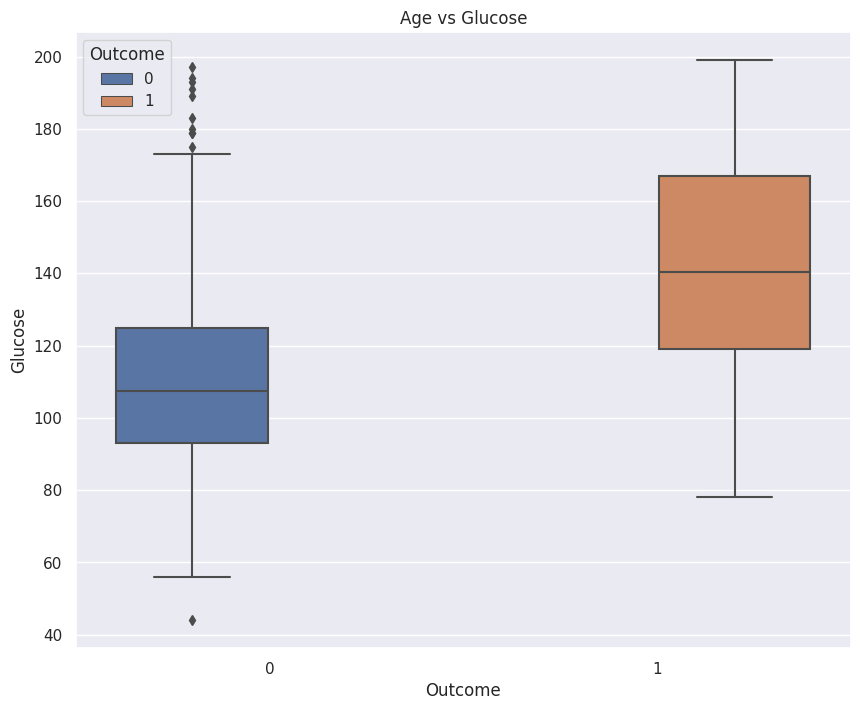

In [37]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df,hue='Outcome')
plt.title('Age vs Glucose')
plt.show()

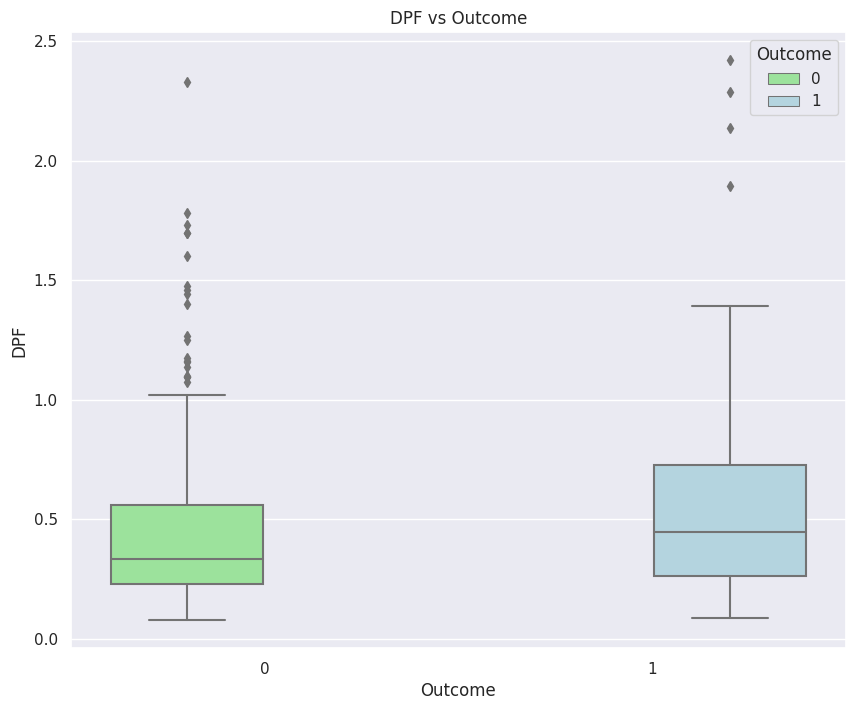

In [38]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DPF', data = df, palette = my_pal,hue='Outcome')
plt.title('DPF vs Outcome')
plt.show()

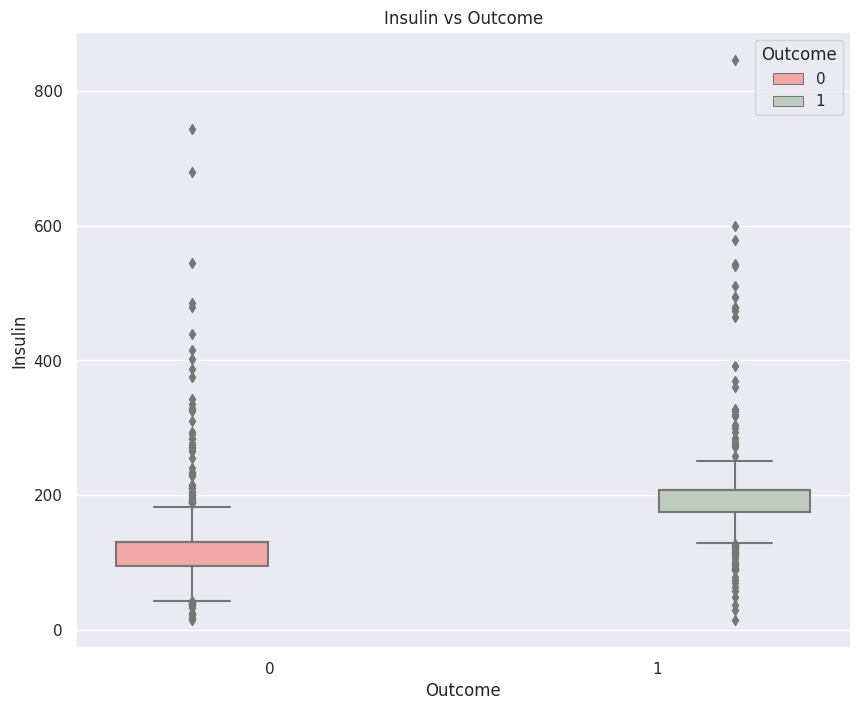

In [39]:
my_pal = {0: "#ff9999", 1: "#bdcebe"}
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df,palette = my_pal,hue='Outcome')
plt.title('Insulin vs Outcome')
plt.show()

<Axes: xlabel='Pregnancies', ylabel='count'>

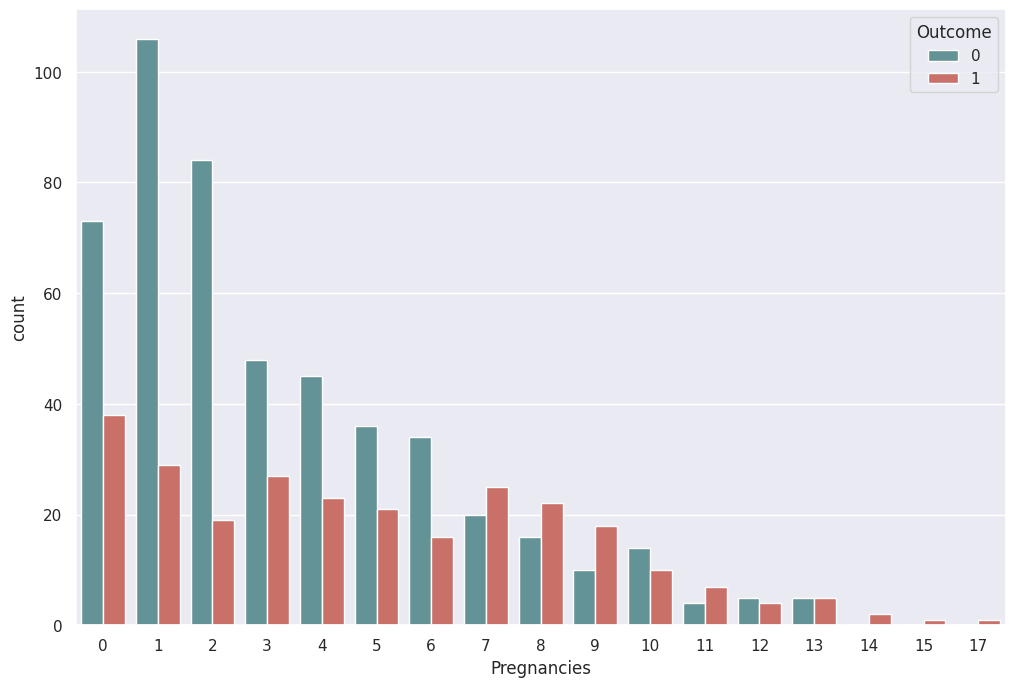

In [40]:
my_pal = {0: "#5b9aa0", 1: "#d96459"}
plt.figure(figsize=(12,8))
sns.countplot(x='Pregnancies',data=df,hue = 'Outcome',palette = my_pal)

### 5. Machine learning models

#### prepare data to fit into model

In [41]:
# set inputs and outputs
X = df.drop(columns='Outcome')
y = df['Outcome']
# creat dict to save model and accuracy
score_list= {}

In [42]:
#scaling
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [43]:
# Split the dataset into 70% Training set and 30% Testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [44]:
# checking the shape of the train and test datasets
print("The shape of x_train is: ",x_train.shape)
print("The shape of x_test is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train is:  (537, 8)
The shape of x_test is:  (231, 8)
The shape of y_train is:  (537,)
The shape of y_test is:  (231,)


In [45]:
# Function for accessing performance:
def classification_model(y_test, prediction, model, x_train, y_train):
    # accuracy score
    accuracy = metrics.accuracy_score(y_test,prediction)
    print ("Accuracy Score: %s" % "{0:.3%}".format(accuracy))
    # F1 score
    f1 = metrics.f1_score(y_test,prediction)
    print ("F1 Score: %s" % "{0:.3%}".format(f1))



    #cross validation with 5 folds
    kf = KFold(n_splits=5)
    kf.split(x_train)

    accuracy_model = []

    for train_index, test_index in kf.split(x_train):
            # Split train-test
            X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
            Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
            # Train the model
            model.fit(X_train, Y_train)
            # Append to accuracy_model the accuracy of the model
            accuracy_model.append(accuracy_score(Y_test, model.predict(X_test)))

    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy_model)))




In [46]:
# Function for confusion matrix plot
def confusion_matrix_plot (y_test, prediction):

    cm = confusion_matrix(y_test, prediction)
    classes = ['0', '1']
    figure, ax = plot_confusion_matrix(conf_mat = cm,
                                       class_names = classes,
                                       show_absolute = True,
                                       show_normed = False,
                                       colorbar = True)

    plt.show()

### 2. Decision Tree Algorthim

Accuracy Score: 80.519%
F1 Score: 74.286%
Cross-Validation Score : 83.809%


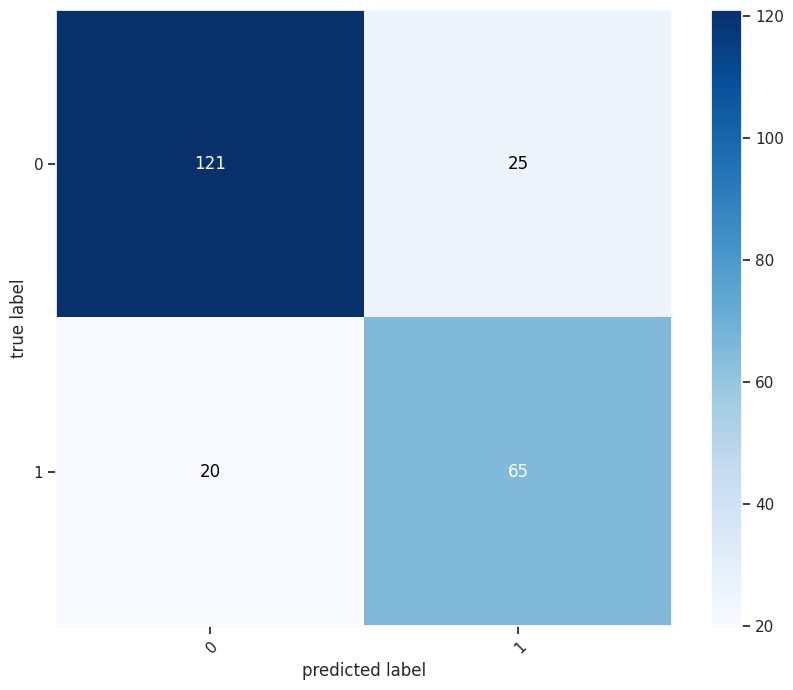

In [47]:
dec_tree = DecisionTreeClassifier()

dec_tree.fit(x_train, y_train)

prediction2 = dec_tree.predict(x_test)

classification_model(y_test, prediction2, dec_tree, x_train, y_train)
confusion_matrix_plot(y_test, prediction2)

### 1. KNN Algorthim

In [48]:
#Finding best K to produce a high accuracy
test_scores = []
train_scores = []

for i in range(1,40):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))


# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_index))))

Max test score 87.01298701298701 % and k = [9]


In [49]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


Text(0, 0.5, 'Accuracy')

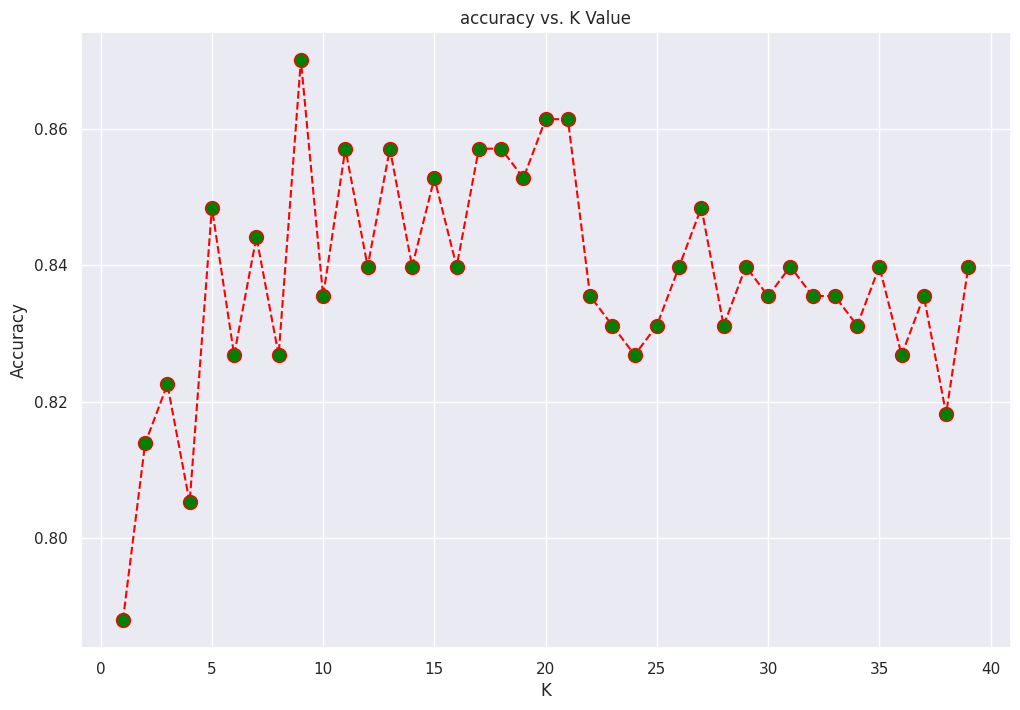

In [50]:
# plot all k we iterate in loop with high accuracy
plt.figure(figsize=(12,8))
plt.plot(range(1,40),test_scores,color = 'red',linestyle='dashed',
         marker='o',markerfacecolor='green', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

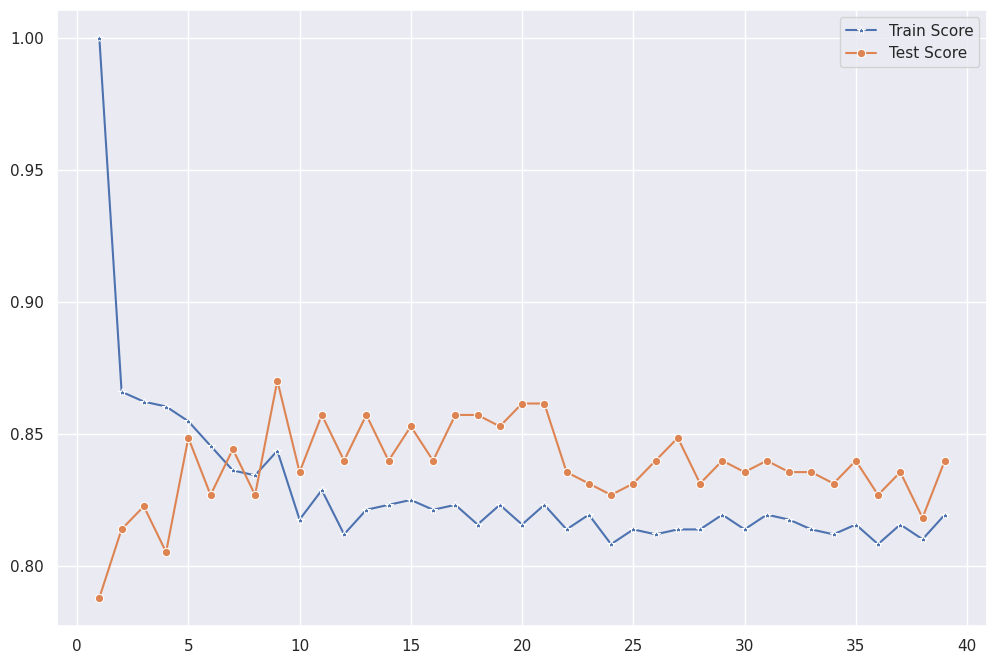

In [51]:
plt.figure(figsize=(12, 8))

# Plotting the train_scores
sns.lineplot(x=range(1, 40), y=train_scores, marker='*', label='Train Score')

# Plotting the test_scores
sns.lineplot(x=range(1, 40), y=test_scores, marker='o', label='Test Score')

# Display the plot
plt.show()

Accuracy Score: 87.013%
F1 Score: 81.250%
Cross-Validation Score : 78.413%


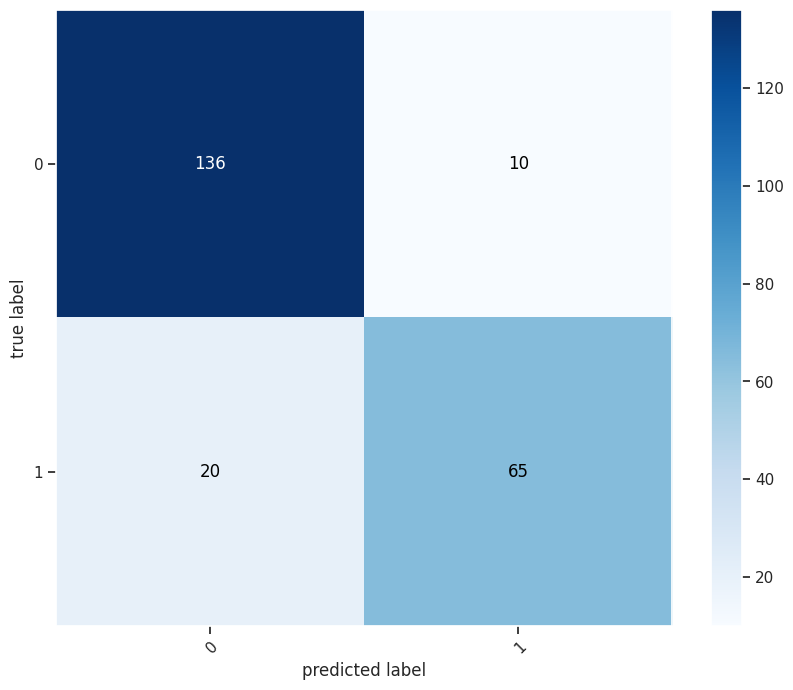

In [52]:
# Train KNN model with the k that verify high accuracy
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
# Predict on the test set
prediction2 = knn.predict(x_test)
classification_model(y_test, prediction2, knn, x_train, y_train)
confusion_matrix_plot(y_test, prediction2)

### 3. Naive Bayes

Accuracy Score: 80.952%
F1 Score: 73.494%
Cross-Validation Score : 78.413%


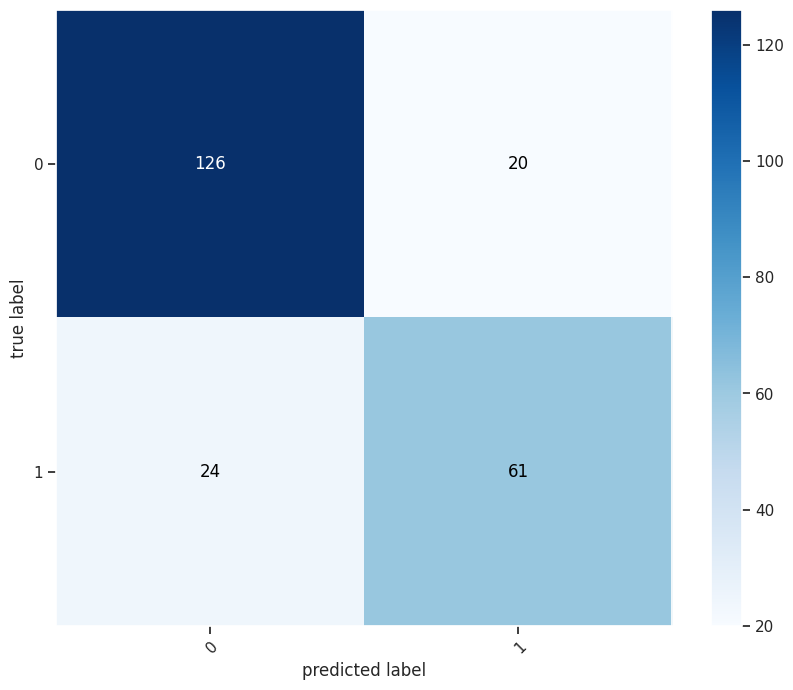

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
#print("print accuracy of naive bayes: % ",nb.score(x_test, y_test)*100)
prediction2 = nb.predict(x_test)
classification_model(y_test, prediction2, knn, x_train, y_train)
confusion_matrix_plot(y_test, prediction2)

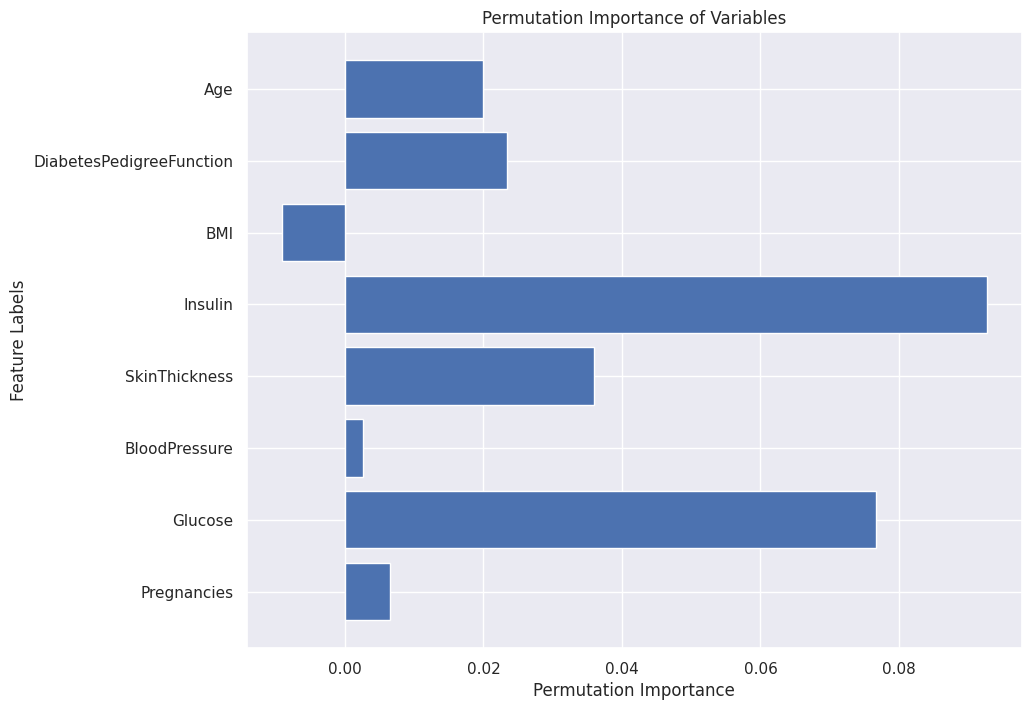

In [54]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming you have already trained your KNN model and named it 'knn'
# If not, replace 'knn' with the actual variable name of your KNN model

# Fit permutation importance
result = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=1)

# Extract feature importances
feature_importances = result.importances_mean

# Plotting
plt.barh(x_train.columns, feature_importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Labels')
plt.title('Permutation Importance of Variables')
plt.show()


### KNN Grid Search

In [55]:
# os
os = SMOTE(random_state=42)
os_data_x,os_data_y = os.fit_resample(x_train, y_train.ravel())

In [56]:
# knn
knn_params = {'n_neighbors': list(range(3, 30,2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=13)
knn_model.fit(os_data_x, os_data_y)
knn_predict = knn_model.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_predict)
knn_score = knn_model.best_score_

In [57]:
print("Knn score after grid search is: {:.2f}".format(knn_score * 100))


Knn score after grid search is: 87.32


###Gradient Boosting Model

Accuracy Score: 89.177%
F1 Score: 85.207%
Cross-Validation Score : 87.534%


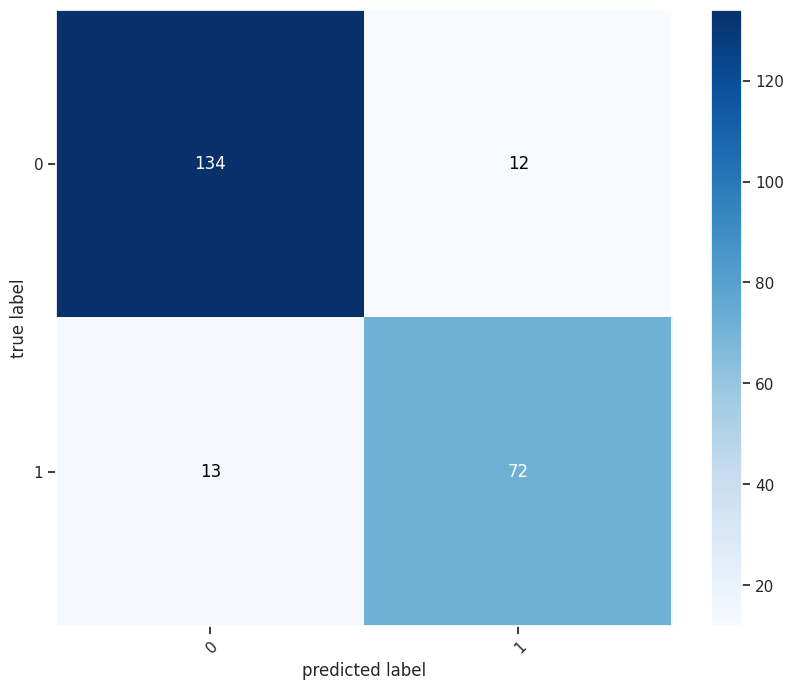

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(x_train, y_train)

prediction4 = gb.predict(x_test)

classification_model(y_test, prediction4, gb, x_train, y_train)
confusion_matrix_plot(y_test, prediction4)

### Feature Importance

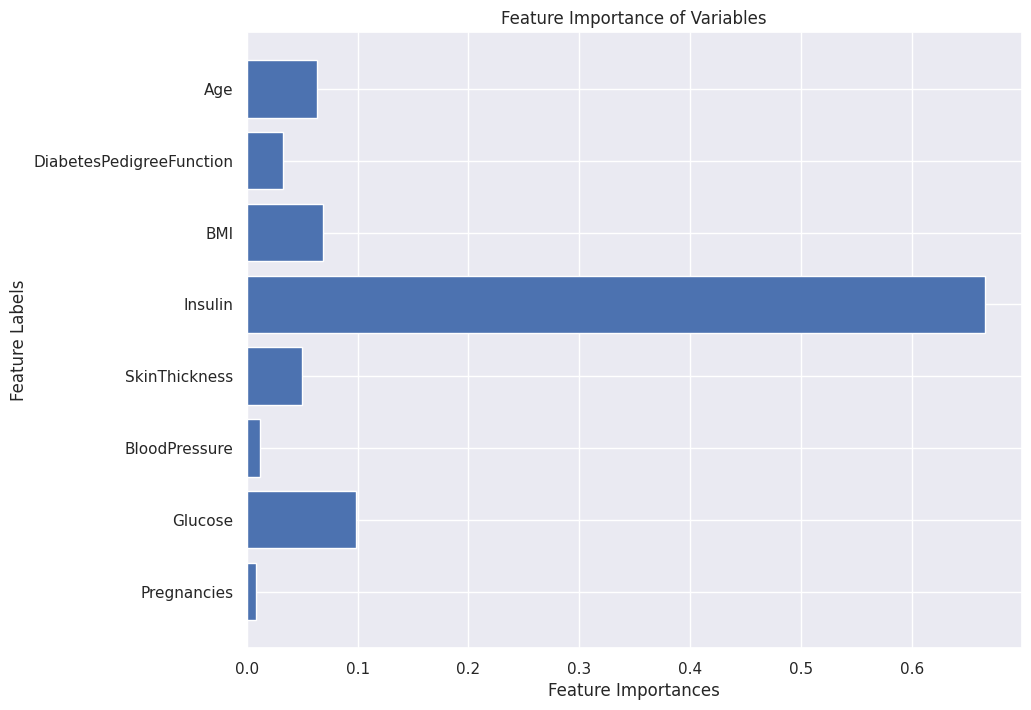

In [59]:
feature_importances = gb.feature_importances_

plt.barh(x_train.columns, feature_importances)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Feature Importance of Variables')
plt.show()